In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

# Read the processed titanic dataframe you've created last class

Store it in a dataframe called `titanic`

In [2]:
titanic = pd.read_csv('titanic_processed.csv')

titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,1,1
4,3,35.0,0,0,8.0500,1,0,1,0


# Let's start simple

You will select two variables to create the predictive variables for your problem - store `['Sex','Age']` in a variable called `X`. 

Also store the variable `'Survived'` into a pandas series called `y`.

In [3]:
X = titanic[['Sex_male','Age']]
y = titanic['Survived']

# Using the `sklearn.model_selection` module, separate your dataset into train and test datasets. 

In fact, what you are effectively doing is hiding some part of your data to analyse your scores afterwards. As you are handling with a small dataset, separate 20% of your dataset to be your test data.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42)

### Logistic regression for classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Use the LogisticRegression classifier to train your model on your train set.

In [5]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Use the `.predict()` method of your model to generate a prediction for your test dataset. 

Create a variable called `y_pred` to put the results of the model. Try to understand what exactly the `.predict()` method is doing. 

_hint: Also try to understand what exactly the method `.predict__proba()` does._

In [6]:
y_pred_test = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)

# Analysing the results obtained.

Print the accuracy score of the model. Is accuracy a good measure for this problem? Why? Remember to check how many event occurrences you have on your variable y. Is the dataset balanced in your opinion?

In [7]:
accuracy = logistic_model.score(X_test, y_test)
print('accuracy: {:.2f}%'.format(100 * accuracy))
# y is slighlty skewed; accuracy might not represent a good evaluation metric
print('proportion of survivals: {:.2f}%'.format(100 * y.mean()))

accuracy: 74.83%
proportion of survivals: 40.45%


### Confusion matrix

Print the confusion matrix for the results obtained.

_hint: You can use the `pd.crosstab()` on your `y__test` variable and your predicted results or use the sklearn.metrics - confusion_matrix method_ 

# Using pd.crosstab()
Store your predicted value and your y_test into a dataframe called pred_results.

In [8]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred_test})

# Now perform a pd.crosstab on the y_test column and the y_pred column

_hint: Store it in a variable called titanic_\__crosstab_

In [9]:
titanic_crosstab = pd.crosstab(pred_results['y_test'], pred_results['y_pred'])

# Now use the confusion_matrix method from sklearn.metrics to obtain the same results

In [10]:
confusion_matrix(pred_results['y_test'], pred_results['y_pred'])

array([[68, 12],
       [24, 39]])

### Precision-recall scores

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

# Calculate the precision and recall scores for the test set. 

In [11]:
precision = precision_score(pred_results['y_test'], pred_results['y_pred'])
print('precision: {:.2f}%'.format(100 * precision))

precision: 76.47%


In [12]:
recall = recall_score(pred_results['y_test'], pred_results['y_pred'])
print('recall: {:.2f}%'.format(100 * recall))

recall: 61.90%


# Compare accuracy, recall and precision for train and test sets. What do you see?

In [13]:
y_pred_train = logistic_model.predict(X_train)

accuracy_train = logistic_model.score(X_train, y_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)

accuracy_test = logistic_model.score(X_test, y_test)
precision_test = precision_score(
    pred_results['y_test'], pred_results['y_pred'])
recall_test = recall_score(pred_results['y_test'], pred_results['y_pred'])

print('train accuracy: {:.2f}%'.format(100 * accuracy_train))
print('test accuracy: {:.2f}%'.format(100 * accuracy_test))
print()
print('train precision: {:.2f}%'.format(100 * precision_train))
print('test precision: {:.2f}%'.format(100 * precision_test))
print()
print('train recall: {:.2f}%'.format(100 * recall_train))
print('test recall: {:.2f}%'.format(100 * recall_test))

train accuracy: 78.73%
test accuracy: 74.83%

train precision: 75.00%
test precision: 76.47%

train recall: 69.33%
test recall: 61.90%


# Identify the number of :
1. TRUE POSITIVES
2. TRUE NEGATIVES
3. FALSE POSITIVES
4. FALSE NEGATIVES

_hint: Now it's time to use that variable titanic_\__crosstab you created before_

In [14]:
titanic_crosstab

y_pred,0,1
y_test,,
0,68,12
1,24,39


In [15]:
TP, TN, FP, FN = 39, 68, 12, 24

print(f'TP: {TP}')
print(f'TN: {TN}')
print(f'FP: {FP}')
print(f'FN: {FN}')

TP: 39
TN: 68
FP: 12
FN: 24


# Use the TRUE POSITIVE AND FALSE POSITIVE to calculate the precision

In [16]:
print('test precision: {:.2f}%'.format(100 * TP / (TP + FP)))

test precision: 76.47%


Explain with your own words the meaning of the precision score.

# Use the TRUE POSITIVE AND FALSE NEGATIVE to calculate the recall

In [17]:
print('test recall: {:.2f}%'.format(100 * TP / (TP + FN)))

test recall: 61.90%


Explain with your own words the meaning of the recall score.

In [18]:
# recall measures how good your model is AT predicting positive outcomes

In [19]:
# precision measures how good your model is WHEN predicting positive outcomes

# Non-linear Models - Trees

# Use the following function to test the results for different models. 

You'll be able to call this function like this, for example:

`logistic_regression = score_model(X, y, LogisticRegression())`

In [20]:
def score_model(X, y, classifier):
    import logging
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
    
    logging.basicConfig(level=logging.INFO)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = classifier
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    logging.info('Test Results')
    logging.info(f'accuracy: {accuracy_score(y_test, y_pred):.2f}')
    logging.info(f'recall: {recall_score(y_test, y_pred):.2f}')
    logging.info(f'precision: {precision_score(y_test, y_pred):.2f}')
    logging.info(f'ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}\n')
    
    logging.info('Train Results')
    logging.info(f'accuracy: {accuracy_score(y_train, model.predict(x_train)):.2f}')
    logging.info(f'recall: {recall_score(y_train, model.predict(x_train)):.2f}')
    logging.info(f'precision: {precision_score(y_train, model.predict(x_train)):.2f}')
    logging.info(f'ROC-AUC: {roc_auc_score(y_train, model.predict(x_train)):.2f}\n')
    
    
    logging.info(f'\n{confusion_matrix(y_test, y_pred)}')
    
    return model

# Use this function to create a DecisionTreeClassifier model. Store the model on a variable called `tree`.

Make sure you understand what the function `score_model` does. Use the default DecisionTreeClassifier for now.

In [21]:
tree = DecisionTreeClassifier()
score_model(X, y, tree)

INFO:root:Test Results
INFO:root:accuracy: 0.71
INFO:root:recall: 0.61
INFO:root:precision: 0.67
INFO:root:ROC-AUC: 0.70

INFO:root:Train Results
INFO:root:accuracy: 0.83
INFO:root:recall: 0.71
INFO:root:precision: 0.85
INFO:root:ROC-AUC: 0.81

INFO:root:
[[66 18]
 [23 36]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Plotting trees

Use the the method `plot_tree()` from `sklearn.tree` module to print the tree on your notebook. Play with arguments like `feature_names`, `class_names`, `proportion`, `filled`...

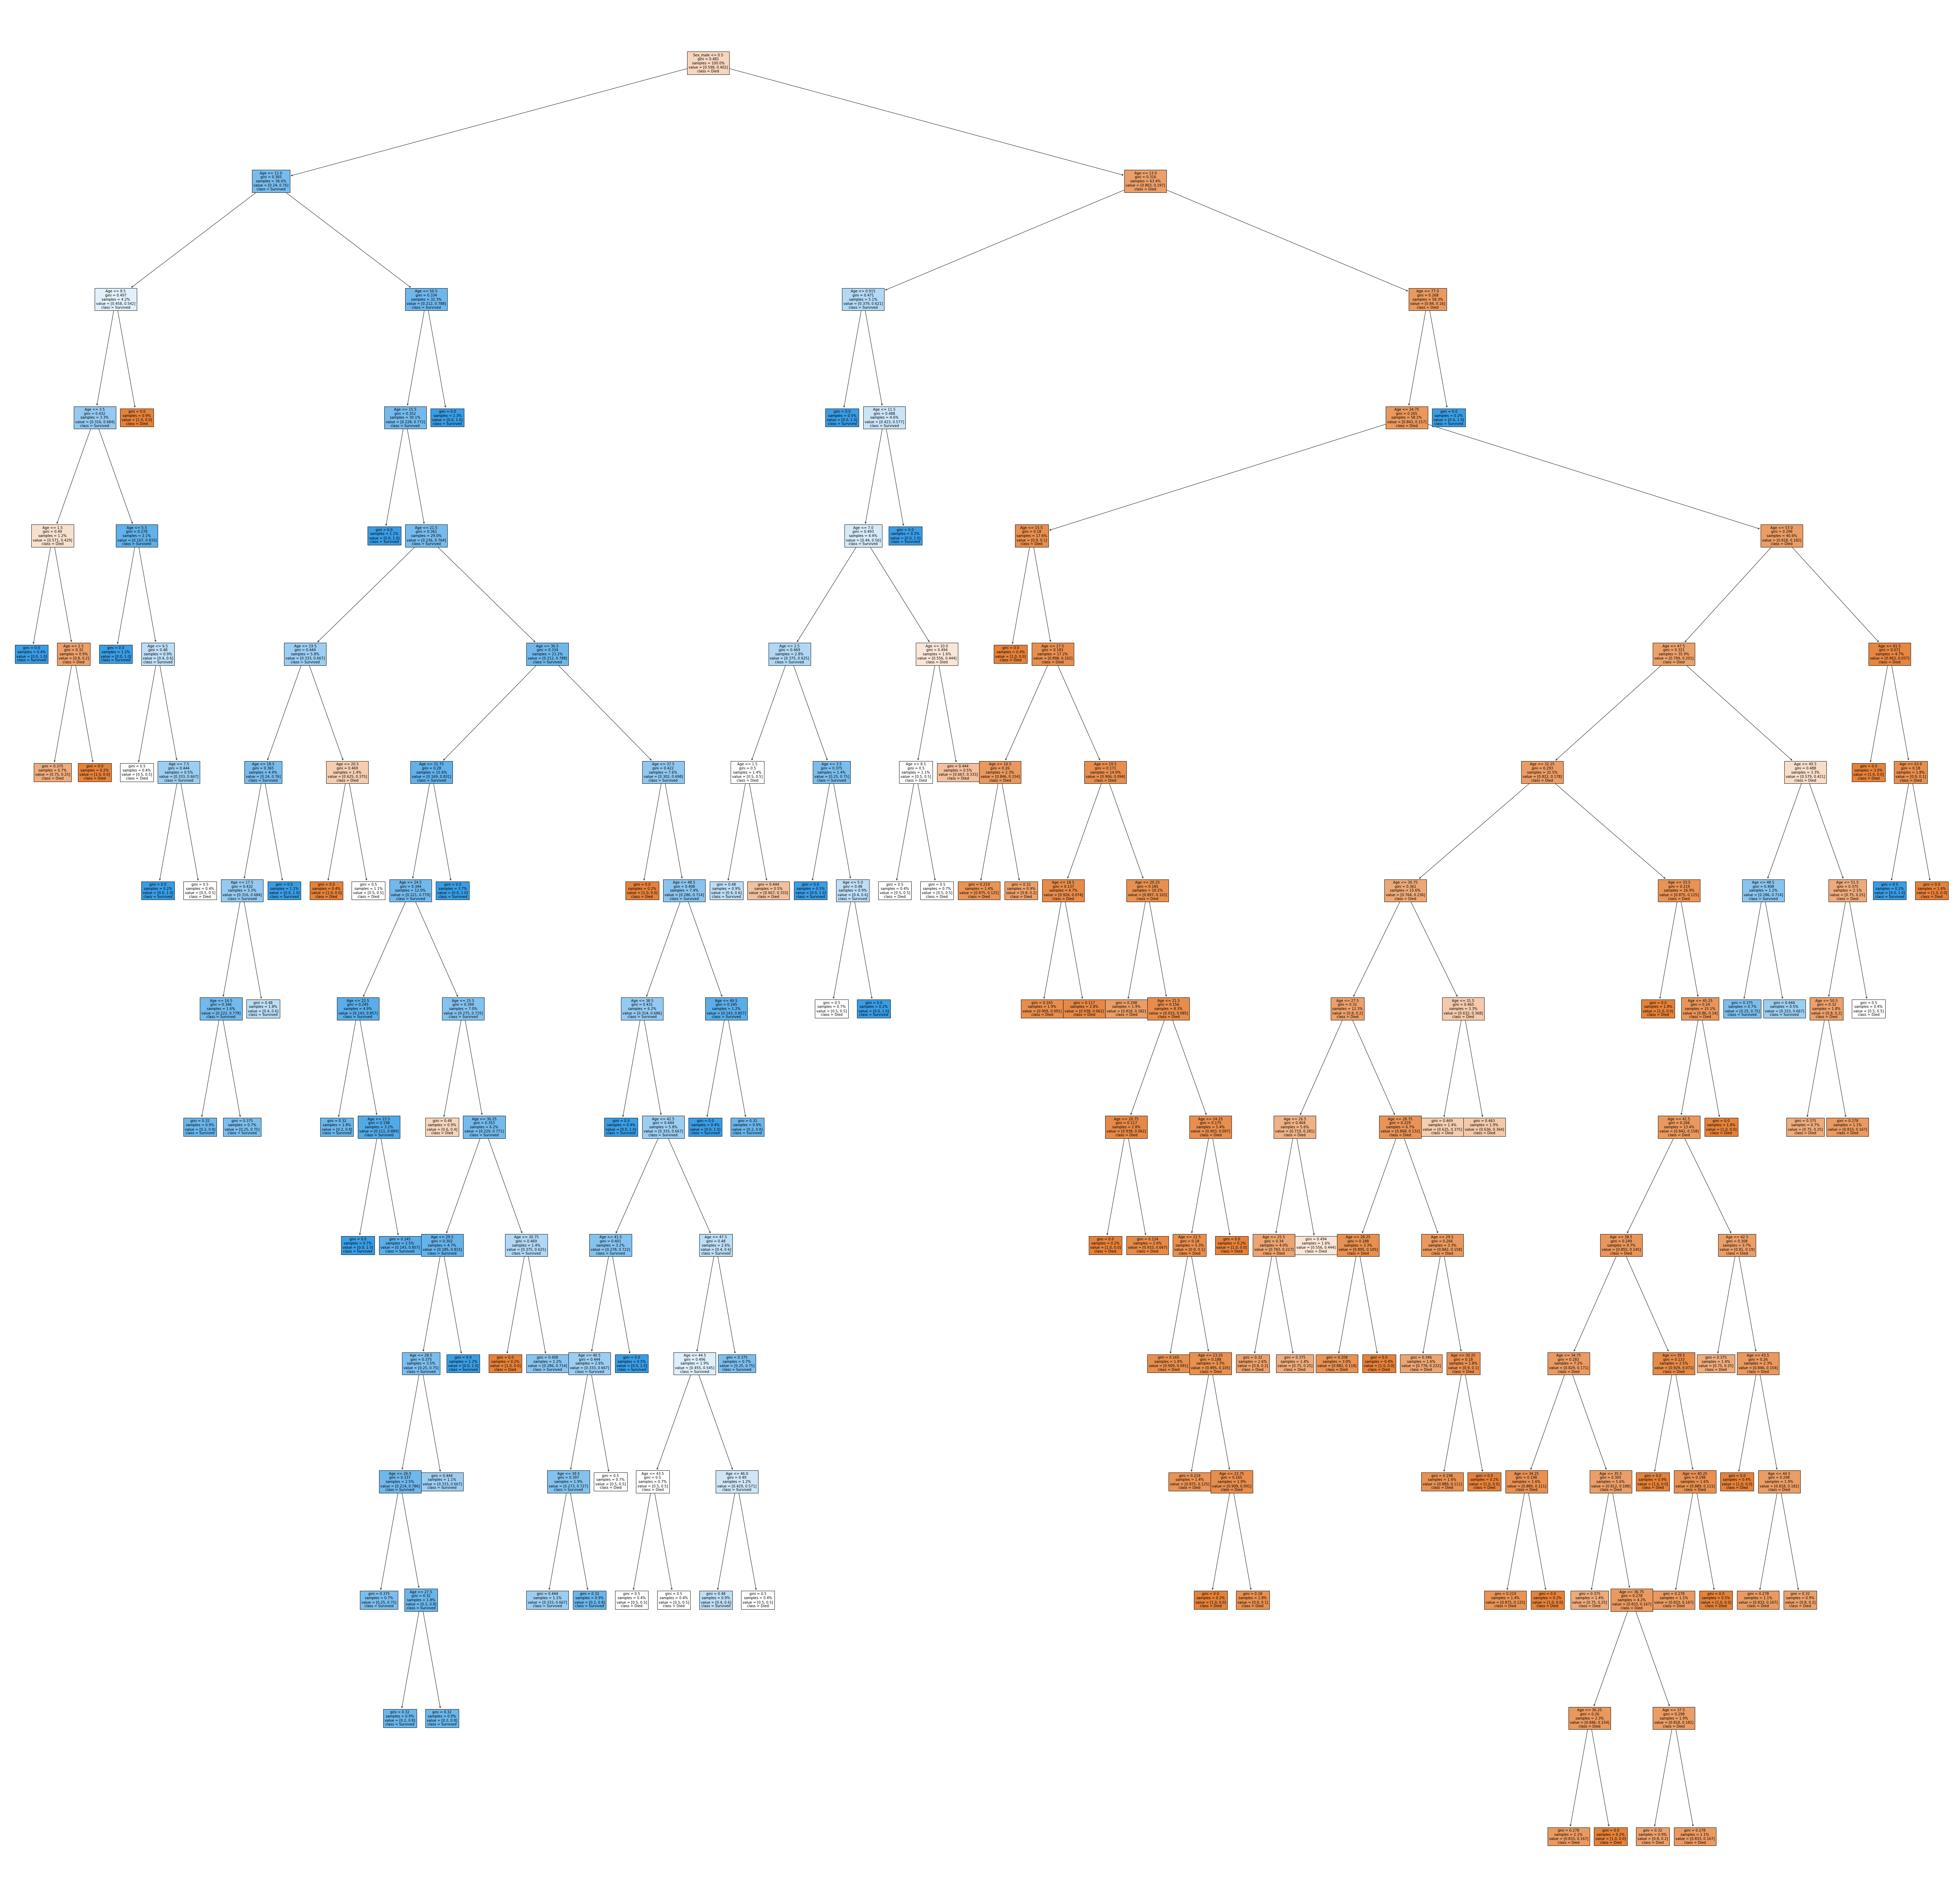

In [22]:
plt.figure(figsize=(100, 100))
plot_tree(tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Died', 'Survived'],
          proportion=True);

What do you think happened? Did you expect such a big tree?

In [23]:
# !pip install mlxtend --user

# Using the `mlxtend.plotting` module, plot the decision boundaries for the Tree classification algorithm.

_hint: you have to convert the dataframes to np.array before plotting in this package_

Note: Include the labels on the plot using: 

`plt.xlabel(x_test.columns[0])`

`plt.ylabel(x_test.columns[1]);`

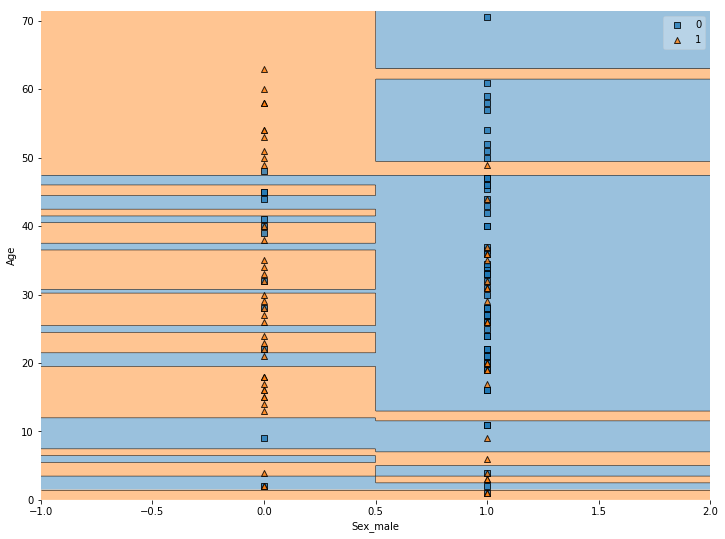

In [24]:
import numpy as np
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 9))
plot_decision_regions(np.array(X_test), np.array(y_test), clf=tree)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1]);

What do you think these wiggles represent?

# Now do the same for the Logistic Regression

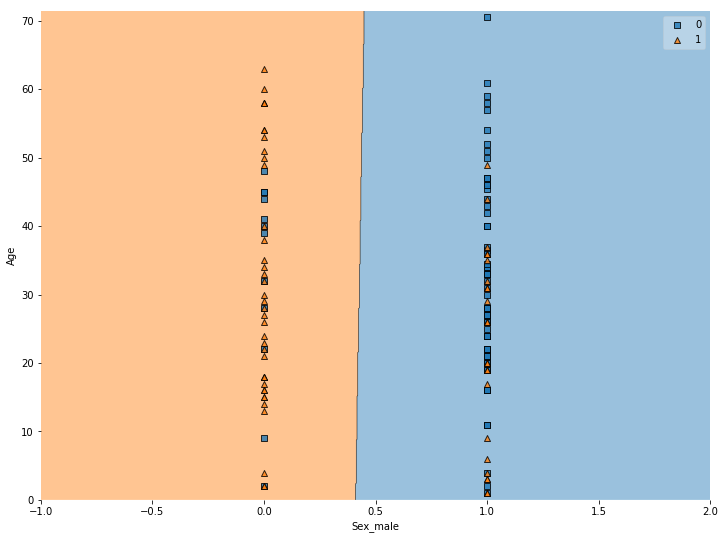

In [25]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 9))
plot_decision_regions(np.array(X_test), np.array(y_test), clf=logistic_model)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1]);

What differences do you observe from them? The variable Age is important for the logistic regression? For different values of Age, how is the decision boundary affected?

# Let's fix the tree algorithm

As you observed, an overfit occurred when using the default values of the DecisionTreeClassifier. Lesson is: **NEVER USE THOSE**. Let's fix it by using a parameter called `max_depth` for the DecisionTreeClassifier().

## Play with the max_depth parameter to see the changes in the results.

In [26]:
new_tree = score_model(X, y, DecisionTreeClassifier(max_depth=3))

INFO:root:Test Results
INFO:root:accuracy: 0.72
INFO:root:recall: 0.63
INFO:root:precision: 0.68
INFO:root:ROC-AUC: 0.71

INFO:root:Train Results
INFO:root:accuracy: 0.82
INFO:root:recall: 0.75
INFO:root:precision: 0.79
INFO:root:ROC-AUC: 0.81

INFO:root:
[[65 18]
 [22 38]]


# Plot the tree again

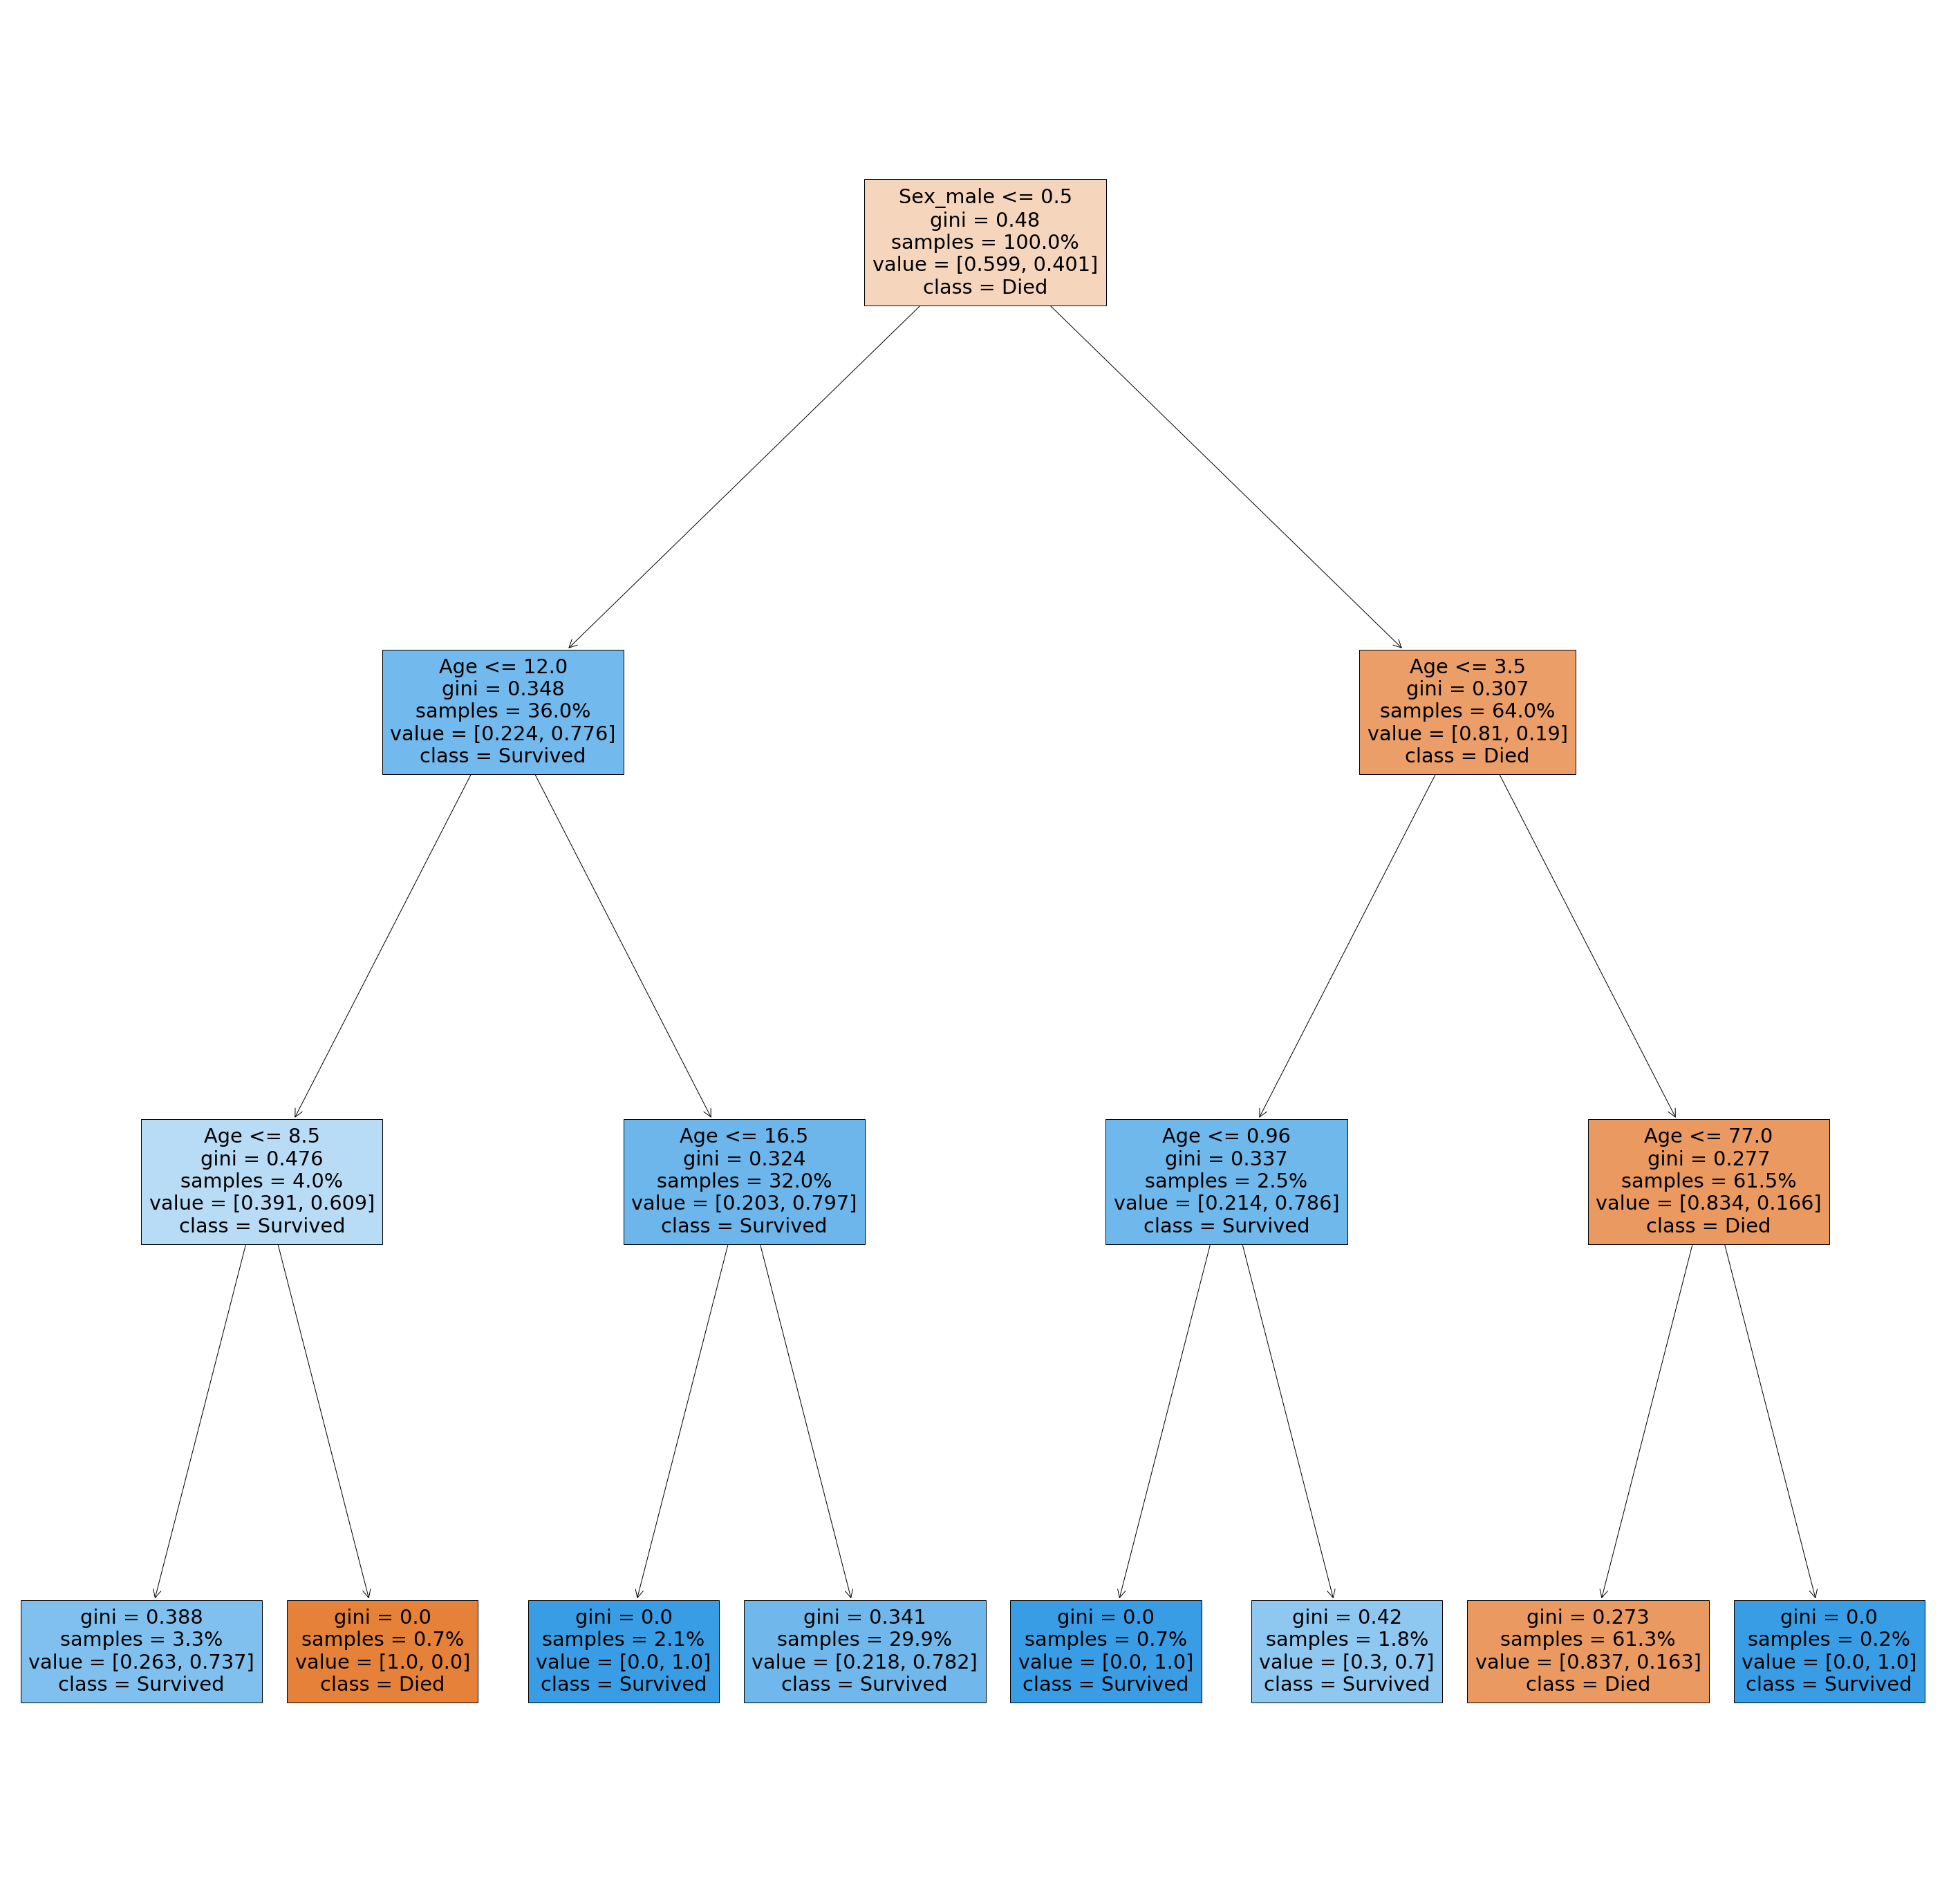

In [27]:
plt.figure(figsize=(50, 50))
plot_tree(new_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Died', 'Survived'],
          proportion=True);

# Plot the decision region again 

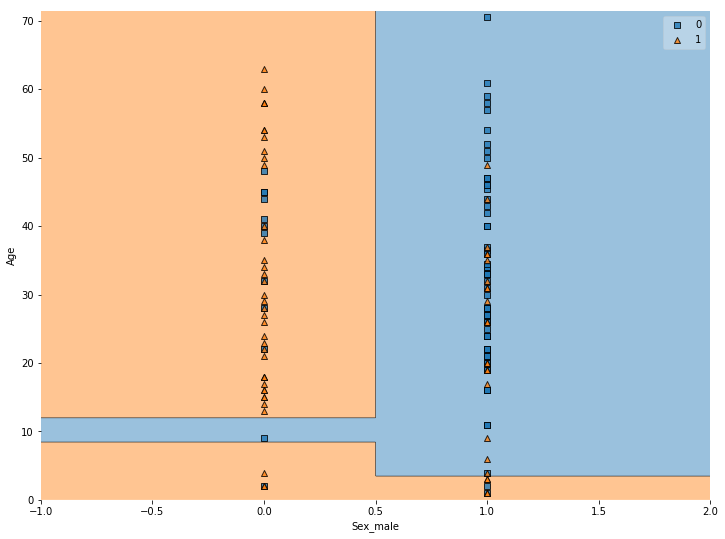

In [28]:
plt.figure(figsize=(12, 9))
plot_decision_regions(np.array(X_test), np.array(y_test), clf=new_tree)
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1]);

# It's time to have fun. Let's use more variables. 

Now have fun plugging in more variables, changing parameters and checking how it affects the results.

In [29]:
variables_list = ['Sex_male','Age','Fare']
X = titanic[variables_list]

score_model(X, y, LogisticRegression())
new_tree2 = score_model(X, y, DecisionTreeClassifier(max_depth=5))


# You may print the tree when using more than 2 variables to understand its results, 
# but the decision boundary will not be able to be seen.

INFO:root:Test Results
INFO:root:accuracy: 0.81
INFO:root:recall: 0.71
INFO:root:precision: 0.75
INFO:root:ROC-AUC: 0.79

INFO:root:Train Results
INFO:root:accuracy: 0.77
INFO:root:recall: 0.69
INFO:root:precision: 0.74
INFO:root:ROC-AUC: 0.76

INFO:root:
[[80 12]
 [15 36]]
INFO:root:Test Results
INFO:root:accuracy: 0.75
INFO:root:recall: 0.57
INFO:root:precision: 0.73
INFO:root:ROC-AUC: 0.72

INFO:root:Train Results
INFO:root:accuracy: 0.83
INFO:root:recall: 0.74
INFO:root:precision: 0.82
INFO:root:ROC-AUC: 0.81

INFO:root:
[[75 12]
 [24 32]]


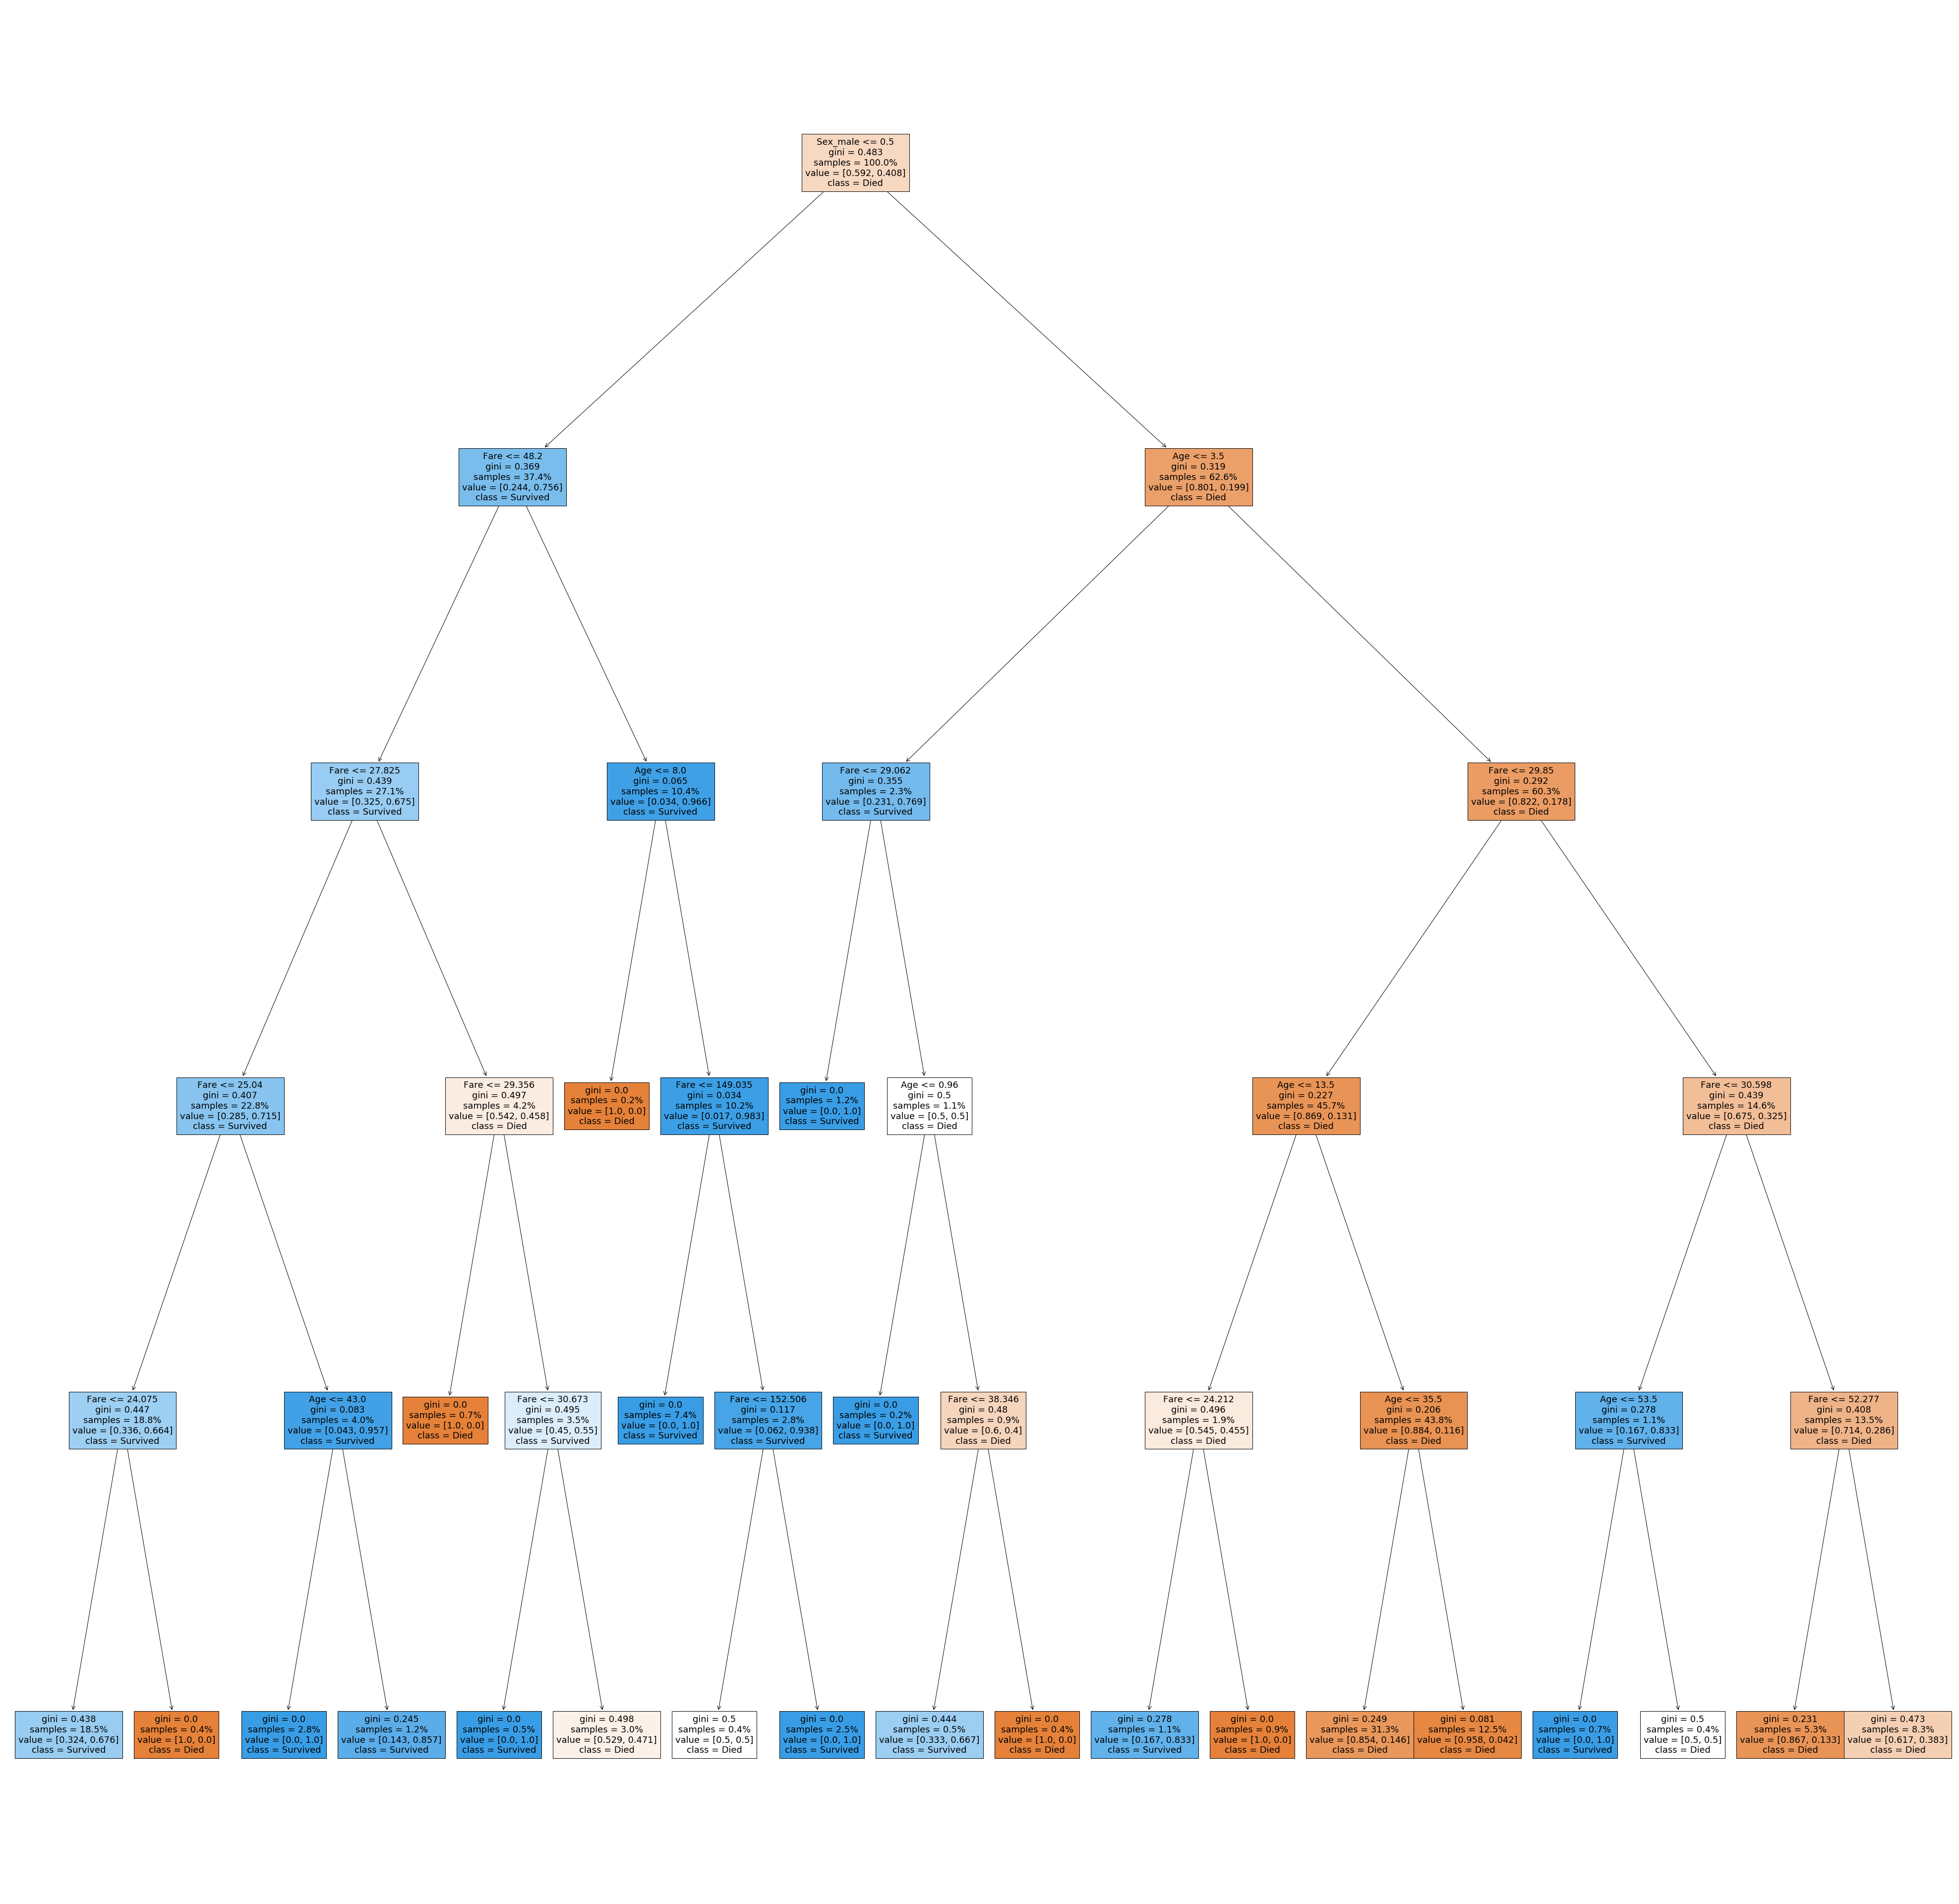

In [30]:
plt.figure(figsize=(70, 70))
plot_tree(new_tree2,
          filled=True,
          feature_names=X.columns,
          class_names=['Died', 'Survived'],
          proportion=True);